In [1]:
# Library Loading
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Data Source
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
# Importing Data
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
545,2014,INFINITI,QX70 AWD,SUV - SMALL,5.0,8,AS7,Z,16.6,11.9,14.5,19,334
344,2014,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,E,24.1,19.2,21.9,13,350
725,2014,MERCEDES-BENZ,C 300 4MATIC FFV,COMPACT,3.5,6,AS7,E,16.4,11.1,14.0,20,224
986,2014,TOYOTA,HIGHLANDER HYBRID AWD LE,SUV - STANDARD,3.5,6,AV6,X,7.9,8.6,8.2,34,189
479,2014,GMC,YUKON XL 4WD,SUV - STANDARD,5.3,8,A6,X,16.0,11.1,13.8,20,317


In [4]:
# Explore data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# Cloning DataFrame and dropping categorical variables
df_temp = df.copy()
categorical_features = []
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        categorical_features.append(label)
categorical_features.extend(['MODELYEAR'])
df_temp = df_temp.drop(categorical_features, axis=1)
df_temp

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [6]:
# Finding Correlation between variables
df_temp.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Look at the bottom row, which shows the correlation between each variable and the target, `CO2EMISSIONS`. Each of these shows a fairly high level of correlation, each exceeding 85% in magnitude. Thus all of these features are good candidates. 

Next, examine the correlations of the distinct pairs. `ENGINESIZE` and 'CYLINDERS' are highly correlated, but `ENGINESIZE` is more correlated with the target, so we can drop `CYLINDERS`. 

Similarly, each of the four fuel economy variables is highly correlated with each other. Since `FUELCONSUMPTION_COMB_MPG` is the most correlated with the target, you can drop the others: `FUELCONSUMPTION_CITY,` `FUELCONSUMPTION_HWY,` `FUELCONSUMPTION_COMB.`

Notice that `FUELCONSUMPTION_COMB` and `FUELCONSUMPTION_COMB_MPG` are not perfectly correlated. They should be, though, because they measure the same property in different units. In practice, you would investigate why this is the case. You might find out that some or all of the data is not useable as is.

In [7]:
# Dropping less correlated variables from above correlation data
df_temp = df_temp.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)
df_temp.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


In [8]:
# Numerical Features 
num_features = ['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

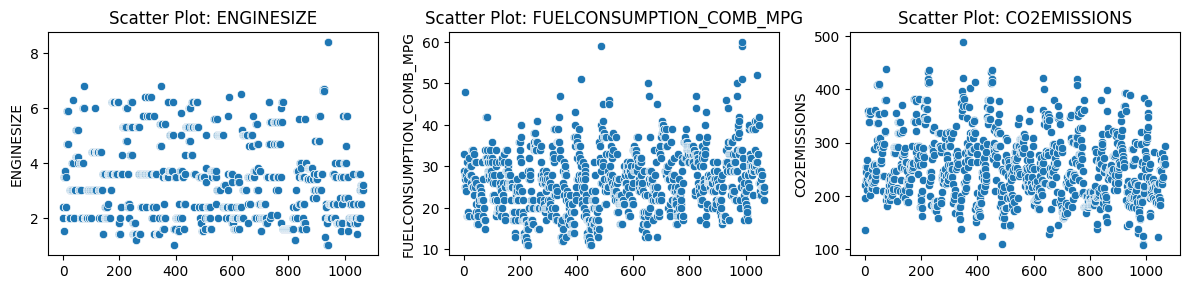

In [9]:
# Normal Scatter Plot
plt.figure(figsize=(12, 8))
for ind, features in enumerate(num_features, 1):
    plt.subplot(3, 3, ind)
    sns.scatterplot(df_temp[features])
    plt.title(f'Scatter Plot: {features}')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

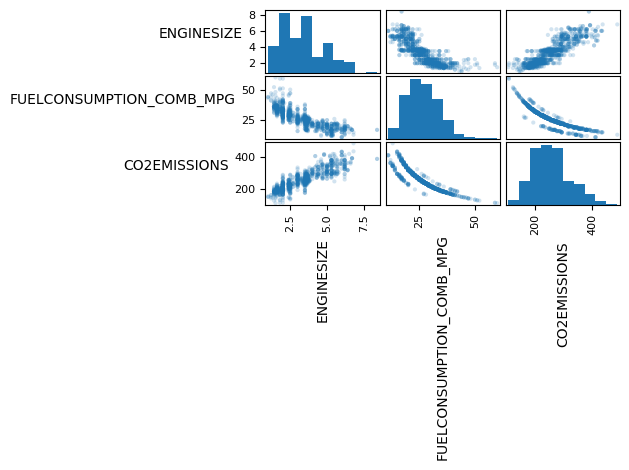

In [10]:
# Visualizing contributing factors and their relations
plt.figure(figsize=(12,8))
axes = pd.plotting.scatter_matrix(df_temp, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0.05, hspace=0.05) # gcf=get current figure
plt.show()

In [11]:
df_temp.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


In [12]:
# Extract input features and labels
X = df_temp.iloc[:, [0, 1]].to_numpy()
y = df_temp.iloc[:, [2]].to_numpy()

In [13]:
# Standardize data using standard scaler (Making mean=0 and std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-0.9512918 ,  0.87855306],
       [-0.66865251,  0.34273362],
       [-1.30459092,  2.88787597],
       ...,
       [-0.24469358, -0.32704069],
       [-0.10337393, -0.19308583],
       [-0.10337393, -0.59495041]])

In [14]:
# Creating DataFrame out of standardized data
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [15]:
# Splitting training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [16]:
# Building model using linear_model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

#Finding coefficient and intercept
coeff = regressor.coef_
intercept = regressor.intercept_
print('Coefficiect: ', coeff)
print('Intercept: ', intercept)

Coefficiect:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


## Calculating `coefficient` and `intercept` based on the original i.e. before standardized data

In [17]:
# First calcualte meand and std of standard scaler
means_ = scaler.mean_
std_ = np.sqrt(scaler.var_)

# Calculating coeff. and intercept for original data
original_coeff = coeff/std_
original_intercept = intercept-np.sum((coeff*means_)/std_)
print('Original Coefficient: ', original_coeff)
print('Original Intercept: ', original_intercept)

Original Coefficient:  [[17.8581369  -5.01502179]]
Original Intercept:  [329.1363967]


## Visualize result

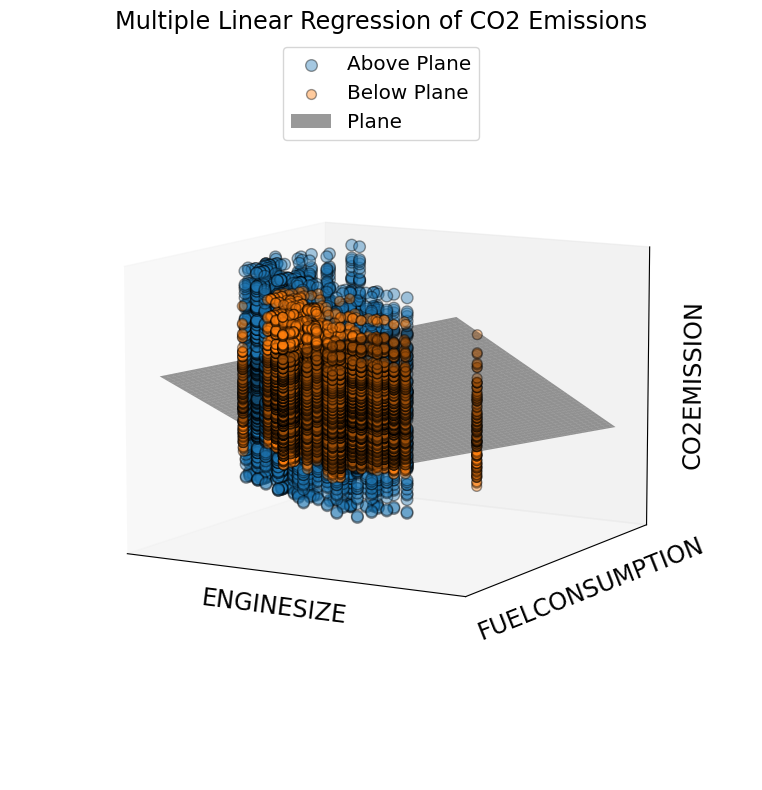

In [19]:
# %matplotlib notebook
X1 = X_test[:, 0] if X_test.ndim>1 else X_test
X2 = X_test[:, 1] if X_test.ndim>1 else np.zeros_like(X1)

# Create mesh grid
X1_surf, X2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))
y_surf = intercept + coeff[0,0]*X1_surf+coeff[0,1]*X2_surf

# Predicting y_pred to compare with actual y_test
y_pred = regressor.predict(X_test.reshape(-1,1)) if X_test.ndim==1 else regressor.predict(X_test)
above_plane = y_test>=y_pred
below_plane = y_test<y_pred
above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]

# Setting subplot
fig = plt.figure(figsize=(20, 8))
plot = fig.add_subplot(111, projection='3d')

# Plotting data
plot.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], label='Above Plane', alpha=0.4, ec='k', s=70)
plot.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], label='Below Plane', ec='k', alpha=0.4, s=50)

# Plotting regression plane
plot.plot_surface(X1_surf, X2_surf, y_surf, color='k', label='Plane', alpha=0.4)

# Adding views and labels
plot.view_init(elev=10)

plot.legend(fontsize='x-large', loc='upper center')
plot.set_xticks([])
plot.set_yticks([])
plot.set_zticks([])
plot.set_box_aspect(None, zoom=0.8)
plot.set_xlabel('ENGINESIZE', fontsize = 'xx-large')
plot.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
plot.set_zlabel('CO2EMISSION', fontsize='xx-large')
plot.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

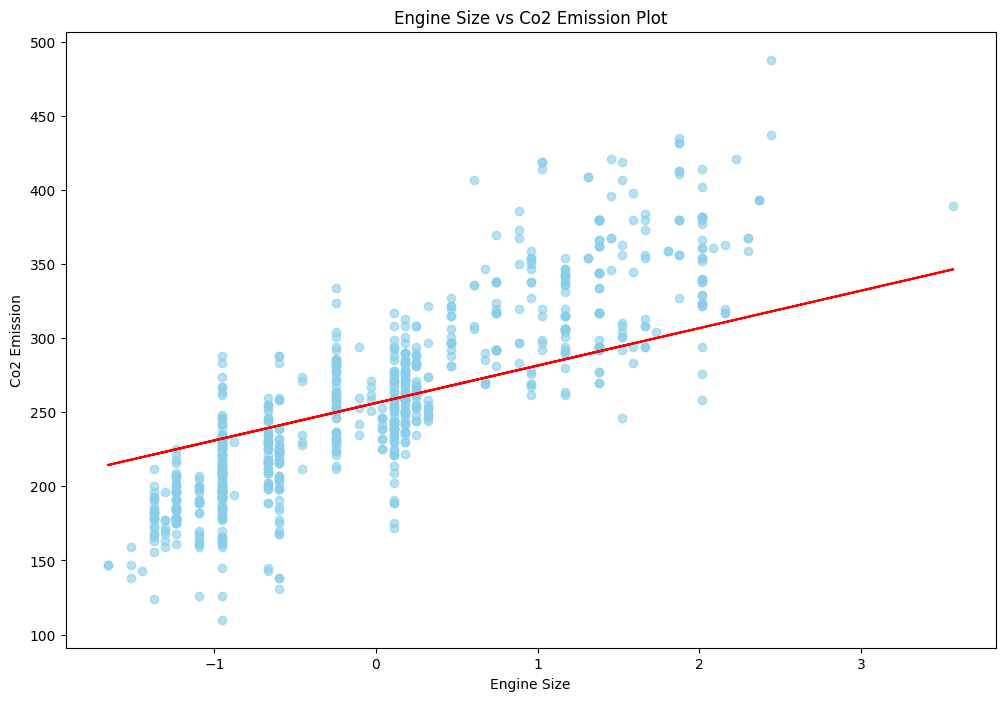

In [30]:
# Lets try with 2D visualization Eninge Size vs Co2 Emission
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color='skyblue', alpha=0.6)
plt.plot(X_train[:, 0], regressor.intercept_[0] + regressor.coef_[0,0]*X_train[:, 0], '-r')
plt.title('Engine Size vs Co2 Emission Plot')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.show()

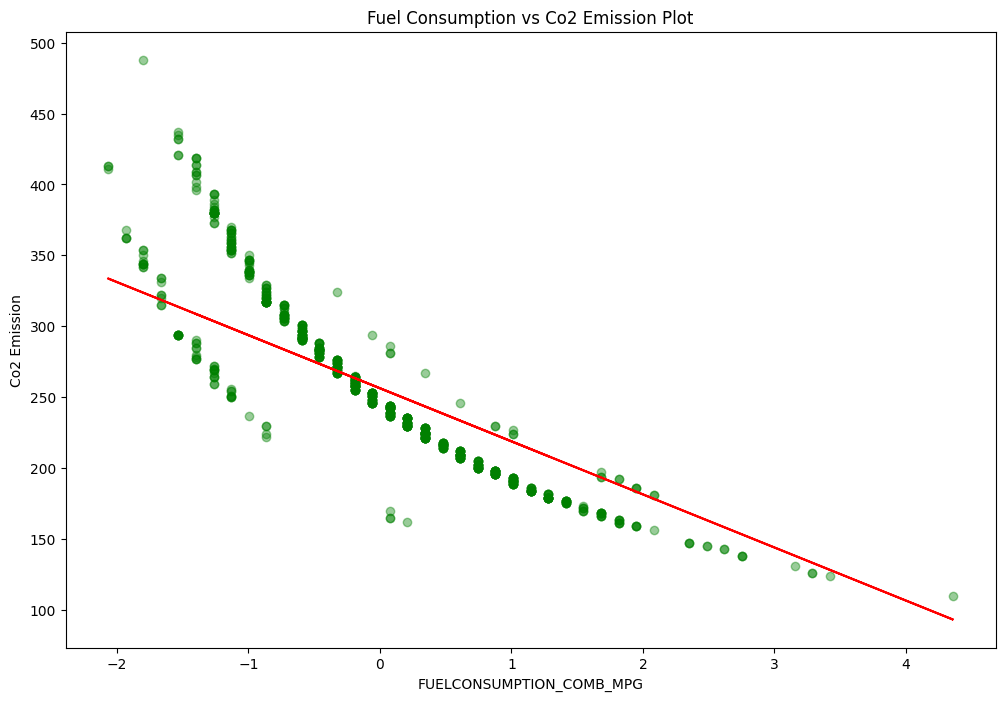

In [32]:
# Lets try with 2D visualization Fuel Consumption vs Co2 Emission
plt.figure(figsize=(12,8))
plt.scatter(X_train[:, 1], y_train, color='green', alpha=0.4)
plt.plot(X_train[:, 1], regressor.coef_[0, 1]*X_train[:, 1]+regressor.intercept_[0], 'r')
plt.title('Fuel Consumption vs Co2 Emission Plot')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('Co2 Emission')
plt.show()

## Lets visualize how test data will do 

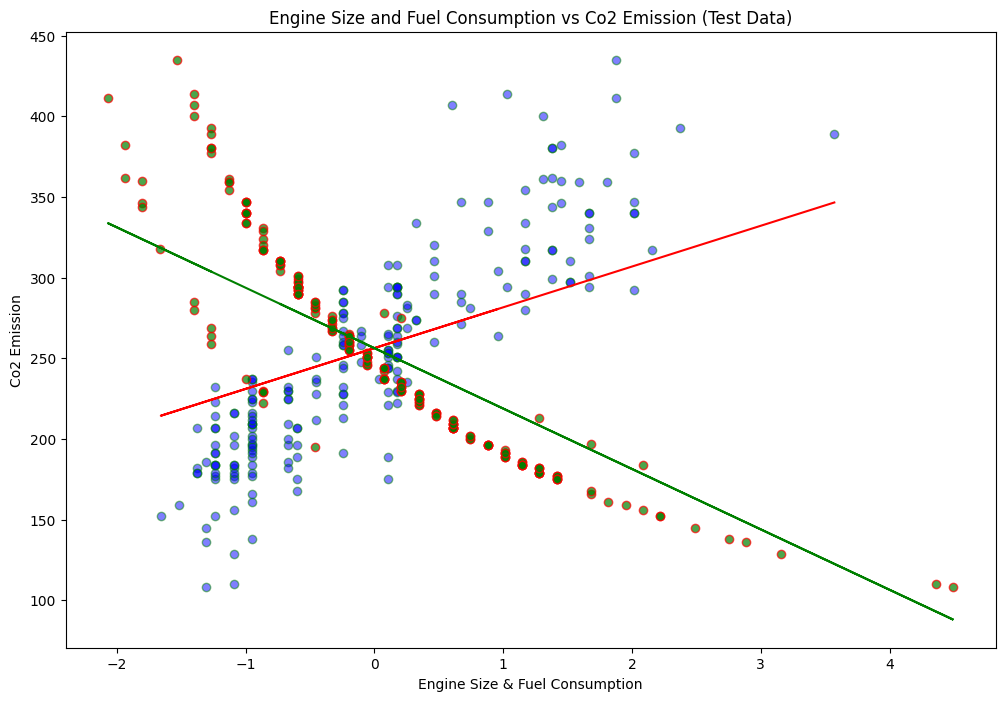

In [49]:
plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, 0], y_test, color='blue', ec='g', alpha=0.5)
plt.scatter(X_test[:, 1], y_test, color='green', ec='r', alpha=0.7)
plt.plot(X_test[:, 0], regressor.coef_[0][0]*X_test[:, 0]+regressor.intercept_[0], '-r')
plt.plot(X_test[:, 1], regressor.coef_[0][1]*X_test[:, 1]+regressor.intercept_[0], '-g')
plt.title('Engine Size and Fuel Consumption vs Co2 Emission (Test Data)')
plt.xlabel('Engine Size & Fuel Consumption')
plt.ylabel('Co2 Emission')
plt.show()